#  2. AS-AD Model
## 2.0 Model Setup

In [356]:
import numpy as np
import sympy as sm
%matplotlib inline
import matplotlib.pyplot as plt 

In the given AS-AD model, the goods market equilibrium is:
$$ y_{t} = -\alpha r_{t} + v_{t} $$

The Central Banks Taylor rule is:
$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

And the ex ante real interest rate is:
$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Those can be combined to yield the AD-curve:
$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

The short-run aggregate supply curve (SRAS) is given as:
$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

And the inflation expectations are adaptive and given by:
$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

The inflation expectations and the SRAS can be combined to express the SRAS-curve as:
$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

We define all the symbols we will be using in sympy:

In [357]:
#Without defining our symbols in sympy, we cannot do the calculations
alpha = sm.symbols('alpha')
h= sm.symbols('h')
b= sm.symbols('b')
phi= sm.symbols('phi')
gamma= sm.symbols('gamma')
pit=sm.symbols('pi_t')
pi1t=sm.symbols('pi_t-1')
vt=sm.symbols('v_t')
yt=sm.symbols('y_t')
y1t=sm.symbols('y_t-1')
st=sm.symbols('s_t')
s1t=sm.symbols('s_t-1')
delta=sm.symbols('delta')
omega=sm.symbols('omega')
xt= sm.symbols('x_t')
ct= sm.symbols('c_t')

#We Ensure that the output is in math notation
sm.init_printing(use_unicode=True) 

The parameters of the model are:

In [358]:
par = {}
par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

## 2.1 Question 1

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

We define the AD- and SRAS-curve:

In [359]:
#we define the AD curve
AD=sm.Eq(pit,(vt-(1+b*alpha)*yt)/(h*alpha))

#we define the SRAS curve
SRAS=sm.Eq(pit,pi1t+gamma*yt-phi*gamma*y1t+st-phi*s1t)
SRAS

We solve the equation system w.r.t. output- and inflation gap

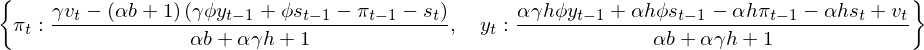

In [360]:
#We solve the equation system with use of the sm.solve function
AD_SRAS_EQ=sm.solve((AD,SRAS),(yt,pit))

#We print the result
AD_SRAS_EQ

In [361]:
# We find the AD and SRAS curves with the given parameters
AD_par=AD.subs({alpha:par['alpha'],h:par['h'],b:par['b'],phi:par['phi'],gamma:par['gamma']})
SRAS_par=SRAS.subs({alpha:par['alpha'],h:par['h'],b:par['b'],phi:par['phi'],gamma:par['gamma']})

#we solve the equation system w.r.t. output- and inflation gap
AD_SRAS_EQ_par=sm.solve((AD_par,SRAS_par),(yt,pit))

#We print the result
AD_SRAS_EQ_par

## 2.2 Question 2

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

In [394]:
#We define the values of the aprameters in the equilibrium we want to examine
vt_value1=0.0
vt_value2=0.1
pi1t_value=0.0
y1t_value=0.0
st_value=0.0
s1t_value=0.0

#We definde the AD curve
def AD_curve(vt,yt,b,alpha,h):
    return (vt-(1+b*alpha)*yt)/(h*alpha)

#We definde the SRAS curve curve
def SRAS_curve(pi1t, gamma, yt, phi, y1t, st, s1t):
    return pi1t+gamma*yt-phi*gamma*y1t+st-phi*s1t

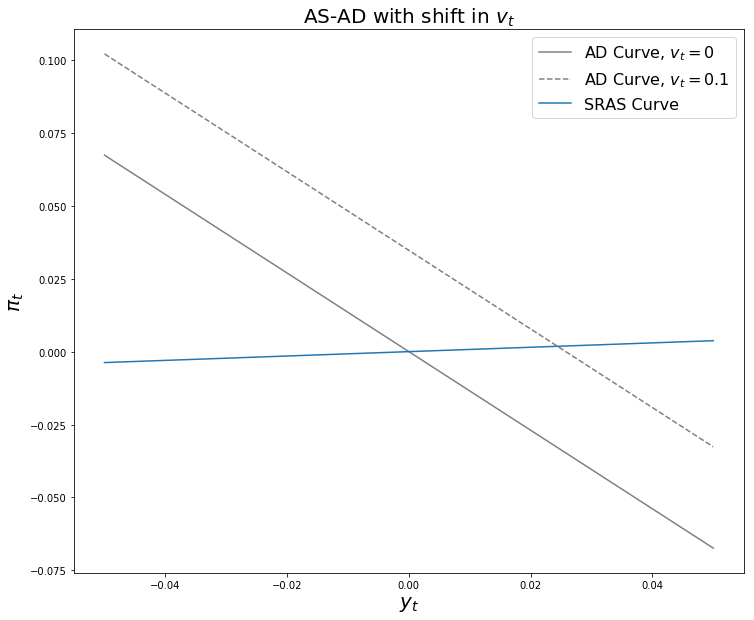

In [363]:
# We define the format and labels of the graph
y = np.linspace(-0.05,0.05,50)
fig, ax = plt.subplots(figsize = (12,10))
ax.set_xlabel('$y_t$', fontsize = 20)
ax.set_ylabel('$\pi_t$', fontsize = 20)
ax.set_title("AS-AD with shift in $v_t$", fontsize = 20)

# We add the AD curve for vt=0
plt.plot(y, AD_curve(vt=vt_value1,yt=y,b=par['b'],alpha=par['alpha'],h=par['h']),label = "AD Curve, $v_t=0$", color='grey')

# We add the AD curve for vt=0.1
plt.plot(y, AD_curve(vt=vt_value2,yt=y,b=par['b'],alpha=par['alpha'],h=par['h']),label = "AD Curve, $v_t=0.1$", color='grey', linestyle = '--')

# We add the SRAS curve
plt.plot(y, SRAS_curve(pi1t=pi1t_value,gamma=par['gamma'],yt=y,phi=par['phi'],y1t=y1t_value,st=st_value,s1t=s1t_value),label = "SRAS Curve")

#We add a legend to the plot
plt.legend(frameon = True,fontsize = 16)

## 2.3 Question 3

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [364]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

First, we create the AR-processes and make a list of the values of $v_t$ and $s_t$ in the periods following the shock(s):

In [365]:
# setting initial values for AR-processes
c0=0
c_rest=0
x0=0.1
x_rest=0 
 
# Number of periods calculated
num=99

# Creating a list of values of vt after num periods
v_values=[]

# Creating the initial value of v
v_initial=par['delta']*vt_value1+x0

# Adding the value to the list of v values 
v_values.append(v_initial)

# Finding the values of v after the inital shock and adding them to the list
def v_shock(number=num):
    for i in range(0,number): 
        vt_i=par['delta']*v_values[i]+x_rest
        v_values.append(vt_i)
v_shock();
        
# Creating a list of values of st after num periods - Not necessary, but doing it for completeness
s_values=[]

# Creating the initial value of s
s_initial=par['omega']*st_value+c0

# Adding the value to the list of s values 
s_values.append(s_initial)

# Finding the values of s after the inital shock and adding them to the list
def s_shock(number=num): 
    for i in range(0,number):
        st_i=par['omega']*s_values[i]+c_rest
        s_values.append(st_i)       
s_shock();


Then, we make a new list of the equilibirum values of $pi_t$ and $y_t$ in the periods after the shock(s), by inserting the values for $v_t$ and $s_t$ in the expression for $pi_t$ and $y_t$

In [366]:
#We create the pi equilibrium value given the initial values
ADAS_Shock_pi=AD_SRAS_EQ_par[pit]

# Creating a list of values of pi after the shock
pi_shock_values=[]

# Creating the initial value of pi
pi_shock_initial=ADAS_Shock_pi.subs({pi1t:pi1t_value,st:s_values[0],vt:v_values[0]})
pi_shock_values.append(pi_shock_initial)

# Finding the values of pi after the inital shock and adding them to the list
def pi_shock(number=num):
    for i in range(0,number): 
        pi_i=ADAS_Shock_pi.subs({st:s_values[i+1],vt:v_values[i+1], pi1t:pi_shock_values[i]})
        pi_shock_values.append(pi_i)
pi_shock();

#We create the pi equilibrium value given the initial values
ADAS_Shock_y=AD_SRAS_EQ_par[yt]

# Creating a list of values of pi after the shock
y_shock_values=[]

# Finding the values of y after the inital shock and adding them to the list. 1 is added to number to ensure the y_shock_values list is 100 long, as we do not compute the initial value
def y_shock(number=num):
    for i in range(0,number+1): 
        y_i=ADAS_Shock_y.subs({st:s_values[i],vt:v_values[i], pi1t:pi_shock_values[i]})
        y_shock_values.append(y_i)
y_shock();

All we need to do now, is to illustrate our y_shock_values and pi_shock_values. We insert the values in the same diagram, to illustrate how they relate:

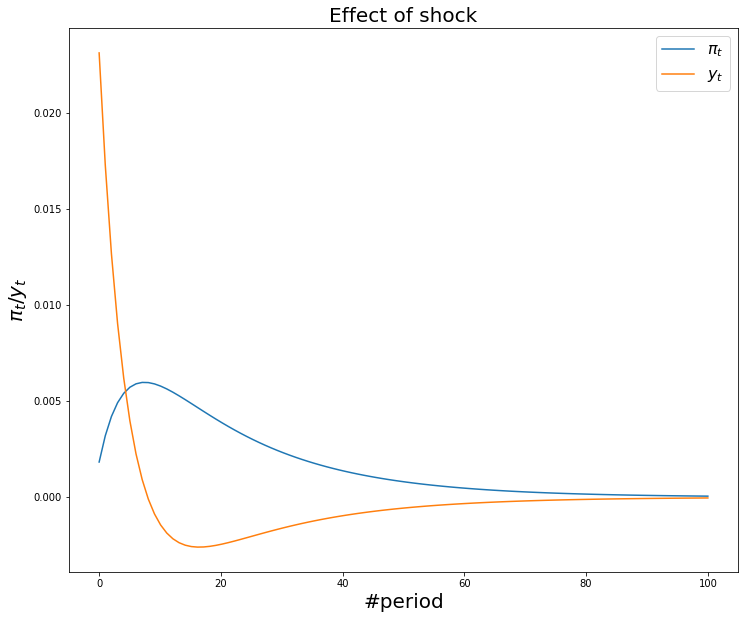

In [367]:
# Constructing graph
y = np.linspace(0,100,100)
fig, ax = plt.subplots(figsize = (12,10))
ax.set_xlabel('#period', fontsize = 20)
ax.set_ylabel('$\pi_t/y_t$', fontsize = 20)
ax.set_title("Effect of shock", fontsize = 20)

#Inserting pi and y values
plt.plot(y, pi_shock_values,label = '$\pi_t$')
plt.plot(y, y_shock_values,label = '$y_t$')

#Adding legend
plt.legend(frameon = True, fontsize = 16)

## 2.4 Question 4

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [368]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

In [504]:
np.random.seed(1312)
sigma_x=np.random.normal(0, par['sigma_x'], size=1000)
sigma_c=np.random.normal(0, par['sigma_c'], size=1000)

In [505]:
# Number of periods calculated
num2=999
c_rest_rand=sigma_c
x_rest_rand=sigma_x 
#Creating the list of v values given the random c values
v_values_rand=[]

# Creating the initial value of v
v_initial_rand=par['delta']*vt_value1+x_rest_rand[0]

# Adding the value to the list of v values 
v_values_rand.append(v_initial_rand)

# Finding the values of v
def v_shock_rand(number=num2):
    for i in range(0,number): 
        vt_i_rand=par['delta']*v_values_rand[i]+x_rest_rand[i]
        v_values_rand.append(vt_i_rand)
v_shock_rand();    

#Creating the list of s values given the random c values
s_values_rand=[]

# Creating the initial value of s
s_initial_rand=par['omega']*st_value+c_rest_rand[0]

# Adding the value to the list of s values 
s_values_rand.append(s_initial_rand)

# Finding the values of s
def s_shock_rand(number=num2): 
    for i in range(0,number):
        st_i_rand=par['omega']*s_values_rand[i]+c_rest_rand[i]
        s_values_rand.append(st_i_rand)       
s_shock_rand();

In [506]:

# Creating a list of values of pi after the shock
pi_rand_values=[]

# Creating the initial value of pi
pi_rand_initial=ADAS_Shock_pi.subs({pi1t:pi1t_value,st:s_values_rand[0],vt:v_values_rand[0]})
pi_rand_values.append(pi_rand_initial)

# Finding the values of pi after the inital shock and adding them to the list
def pi_rand(number=num2):
    for i in range(0,number): 
        pi_i_rand=ADAS_Shock_pi.subs({st:s_values_rand[i],vt:v_values_rand[i], pi1t:pi_rand_values[i]})
        pi_rand_values.append(pi_i_rand)
pi_rand();

# Creating a list of values of pi after the shock
y_rand_values=[]

# Finding the values of y after the inital shock and adding them to the list. 1 is added to number to ensure the y_shock_values list is 100 long, as we do not compute the initial value
def y_rand(number=num2):
    for i in range(0,number+1): 
        y_i_rand=ADAS_Shock_y.subs({st:s_values_rand[i],vt:v_values_rand[i], pi1t:pi_rand_values[i]})
        y_rand_values.append(y_i_rand)
y_rand();


In [507]:
y_rand_var=np.var(y_rand_values)
pi_rand_var=np.var(pi_rand_values)
pi_y_corr=np.correlate(pi_rand_values,y_rand_values)
y_auto_corr=np.correlate(y_rand_values[1:], y_rand_values[:-1])
pi_auto_corr=np.correlate(pi_rand_values[1:], pi_rand_values[:-1])

print(str('y-variance: ')+ str(y_rand_var))
print(str('pi-variance: ')+ str(pi_rand_var))
print(str('pi_y-correlation: ')+ str(pi_y_corr))
print(str('y-auto correlation: ')+ str(y_auto_corr))
print(str('pi-auto correlation: ')+ str(pi_auto_corr))


y-variance: 2.09973587914483
pi-variance: 1.08258089254968
pi_y-correlation: [-500.494142147882]
y-auto correlation: [1683.07278560225]
pi-auto correlation: [1152.23004688365]


## 2.5 Question 5

**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

## 2.6 Question 6

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$